In [1]:
### Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Loading data from url
data_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(data_url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


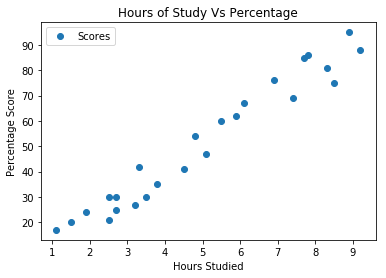

In [3]:
### Exploratory Data Analysis of the data

data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours of Study Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [4]:
### Preparing the data for training

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=0)

In [6]:
### Training your algorithm
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

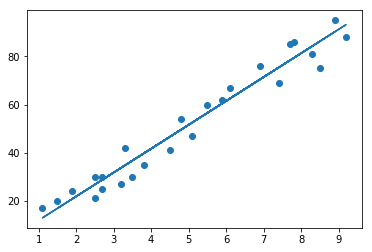

In [7]:
### Plotting the regression line
line = lin_reg.coef_*X + lin_reg.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [9]:
### Prediction
y_pred = lin_reg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [10]:
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
### What will be predicted score if a student studies for 9.25 hrs/ day?

hrs = 9.25
prediction = lin_reg.predict(hrs)
print("No of hours : ", hrs)
print("Predicted Score : ", prediction[0])

No of hours :  9.25
Predicted Score :  93.69173248737538


In [13]:
### Model Evaluation

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002975
